# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### In this project, we aim to find the factors that are responsible for predicting the price of a used vehicle. These factors could be the model, manufacturing year, manufacturer, region, odometer readings, number of cylinders, etc. We will do so by utilising Exploratory Data Analysis techniques to see the relationship among the factors and price, we will then build Regression machine learning model to predict the price based on the most significant factors that our model identifies and provide us with accurate price prediction.  

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


import xgboost as xgb
from lightgbm import LGBMRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
import warnings


pd.set_option('display.float_format', '{:,.0f}'.format)
# Disable all warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('data/vehicles.csv') # Load dataset
df

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,"2,019",nissan,maxima s sedan 4d,good,6 cylinders,gas,"32,226",clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,"2,020",volvo,s60 t5 momentum sedan 4d,good,NaN,gas,"12,029",clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,"2,020",cadillac,xt4 sport suv 4d,good,NaN,diesel,"4,174",clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,"2,018",lexus,es 350 sedan 4d,good,6 cylinders,gas,"30,112",clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [4]:
df.shape

(426880, 18)

## Check  for null values


In [5]:
null_df = df.isnull().sum()
print(type(null_df),null_df)


<class 'pandas.core.series.Series'> id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


In [6]:
null_df = pd.DataFrame(null_df)
null_df = null_df.reset_index()
null_df.columns = ['column_name','null_count']
null_df

,column_name,null_count
0,id,0
1,region,0
2,price,0
3,year,1205
4,manufacturer,17646
5,model,5277
6,condition,174104
7,cylinders,177678
8,fuel,3013
9,odometer,4400


In [7]:
null_df['null_percent'] = (null_df['null_count']/df.shape[0])*100
null_df = null_df[null_df['null_count'] > 0]
null_df

,column_name,null_count,null_percent
3,year,1205,0
4,manufacturer,17646,4
5,model,5277,1
6,condition,174104,41
7,cylinders,177678,42
8,fuel,3013,1
9,odometer,4400,1
10,title_status,8242,2
11,transmission,2556,1
12,VIN,161042,38


### from above results, we can drop the null values of columns having lower null_percent

In [8]:
df = df.dropna(subset=['year','manufacturer','model','fuel','odometer','transmission','title_status'],how='any')
df.reset_index(drop=True,inplace=True)
df

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7316814884,auburn,33590,"2,014",gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,"57,923",clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,al
1,7316814758,auburn,22590,"2,010",chevrolet,silverado 1500,good,8 cylinders,gas,"71,229",clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,al
2,7316814989,auburn,39590,"2,020",chevrolet,silverado 1500 crew,good,8 cylinders,gas,"19,160",clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,al
3,7316743432,auburn,30990,"2,017",toyota,tundra double cab sr,good,8 cylinders,gas,"41,124",clean,other,5TFRM5F17HX120972,NaN,NaN,pickup,red,al
4,7316356412,auburn,15000,"2,013",ford,f-150 xlt,excellent,6 cylinders,gas,"128,000",clean,automatic,NaN,rwd,full-size,truck,black,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389599,7301591192,wyoming,23590,"2,019",nissan,maxima s sedan 4d,good,6 cylinders,gas,"32,226",clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
389600,7301591187,wyoming,30590,"2,020",volvo,s60 t5 momentum sedan 4d,good,NaN,gas,"12,029",clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
389601,7301591147,wyoming,34990,"2,020",cadillac,xt4 sport suv 4d,good,NaN,diesel,"4,174",clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
389602,7301591140,wyoming,28990,"2,018",lexus,es 350 sedan 4d,good,6 cylinders,gas,"30,112",clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


In [9]:
len(df)/426879

0.9126801740071543

more than 91% data is still available

In [10]:
null_df = df.isnull().sum()
null_df = null_df.reset_index()
null_df.columns = ['column_name','null_count']
null_df

,column_name,null_count
0,id,0
1,region,0
2,price,0
3,year,0
4,manufacturer,0
5,model,0
6,condition,157282
7,cylinders,161353
8,fuel,0
9,odometer,0


In [11]:
df['condition'].value_counts()

good         115016
excellent     89762
like new      19970
fair           5918
new            1124
salvage         532
Name: condition, dtype: int64

In [12]:
df['cylinders'].value_counts()


6 cylinders     86753
4 cylinders     71113
8 cylinders     66131
5 cylinders      1524
10 cylinders     1302
other             800
3 cylinders       520
12 cylinders      108
Name: cylinders, dtype: int64

In [13]:
df

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7316814884,auburn,33590,"2,014",gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,"57,923",clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,al
1,7316814758,auburn,22590,"2,010",chevrolet,silverado 1500,good,8 cylinders,gas,"71,229",clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,al
2,7316814989,auburn,39590,"2,020",chevrolet,silverado 1500 crew,good,8 cylinders,gas,"19,160",clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,al
3,7316743432,auburn,30990,"2,017",toyota,tundra double cab sr,good,8 cylinders,gas,"41,124",clean,other,5TFRM5F17HX120972,NaN,NaN,pickup,red,al
4,7316356412,auburn,15000,"2,013",ford,f-150 xlt,excellent,6 cylinders,gas,"128,000",clean,automatic,NaN,rwd,full-size,truck,black,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389599,7301591192,wyoming,23590,"2,019",nissan,maxima s sedan 4d,good,6 cylinders,gas,"32,226",clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
389600,7301591187,wyoming,30590,"2,020",volvo,s60 t5 momentum sedan 4d,good,NaN,gas,"12,029",clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
389601,7301591147,wyoming,34990,"2,020",cadillac,xt4 sport suv 4d,good,NaN,diesel,"4,174",clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
389602,7301591140,wyoming,28990,"2,018",lexus,es 350 sedan 4d,good,6 cylinders,gas,"30,112",clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


In [14]:
df.describe()

,id,price,year,odometer
count,"389,604","389,604","389,604","389,604"
mean,"7,311,508,295","63,955","2,012","96,352"
std,"4,375,217","11,448,646",9,"191,418"
min,"7,301,583,321",0,"1,900",0
25%,"7,308,158,162","5,995","2,009","38,093"
50%,"7,312,676,366","13,995","2,014","85,753"
75%,"7,315,257,097","26,590","2,017","133,315"
max,"7,317,101,084","3,736,928,711","2,022","10,000,000"


In [15]:
df.manufacturer.value_counts()

ford               67811
chevrolet          52326
toyota             32509
honda              20407
jeep               18150
nissan             18053
ram                16770
gmc                15941
bmw                14224
dodge              12864
mercedes-benz      11195
hyundai             9872
subaru              9159
volkswagen          9026
kia                 8120
lexus               7907
audi                7322
cadillac            6555
acura               5807
chrysler            5699
buick               5291
mazda               5193
infiniti            4679
lincoln             4019
volvo               3221
mitsubishi          3096
mini                2287
pontiac             2195
jaguar              1892
rover               1752
porsche             1294
mercury             1145
saturn              1044
alfa-romeo           887
tesla                818
fiat                 768
harley-davidson      124
ferrari               75
datsun                62
aston-martin          24


In [16]:
df.groupby(by='manufacturer')['price'].max()


manufacturer
acura                  139999
alfa-romeo              62950
aston-martin           179888
audi                   160000
bmw                    138000
buick               123456789
cadillac               195000
chevrolet           123456789
chrysler               655000
datsun                  30000
dodge                 6995495
ferrari                349999
fiat                    32500
ford               1111111111
gmc                 123456789
harley-davidson         39900
honda                  123456
hyundai                 50000
infiniti                69995
jaguar                 150000
jeep               1410065407
kia                     55325
land rover              55000
lexus                  114950
lincoln               1234567
mazda                   45000
mercedes-benz      3024942282
mercury                 60000
mini                    42500
mitsubishi              39999
nissan              135008900
pontiac                 98000
porsche                3049

In [17]:
df.groupby(by='manufacturer')['price'].agg(['median','count'])

,median,count
manufacturer,,
acura,"18,990",5807
alfa-romeo,"29,590",887
aston-martin,"46,998",24
audi,"23,971",7322
bmw,"16,950",14224
buick,"11,600",5291
cadillac,"16,900",6555
chevrolet,"14,677",52326
chrysler,"7,495",5699


### Check median (not affected by outliers compared to mean) car price by manufacturer 

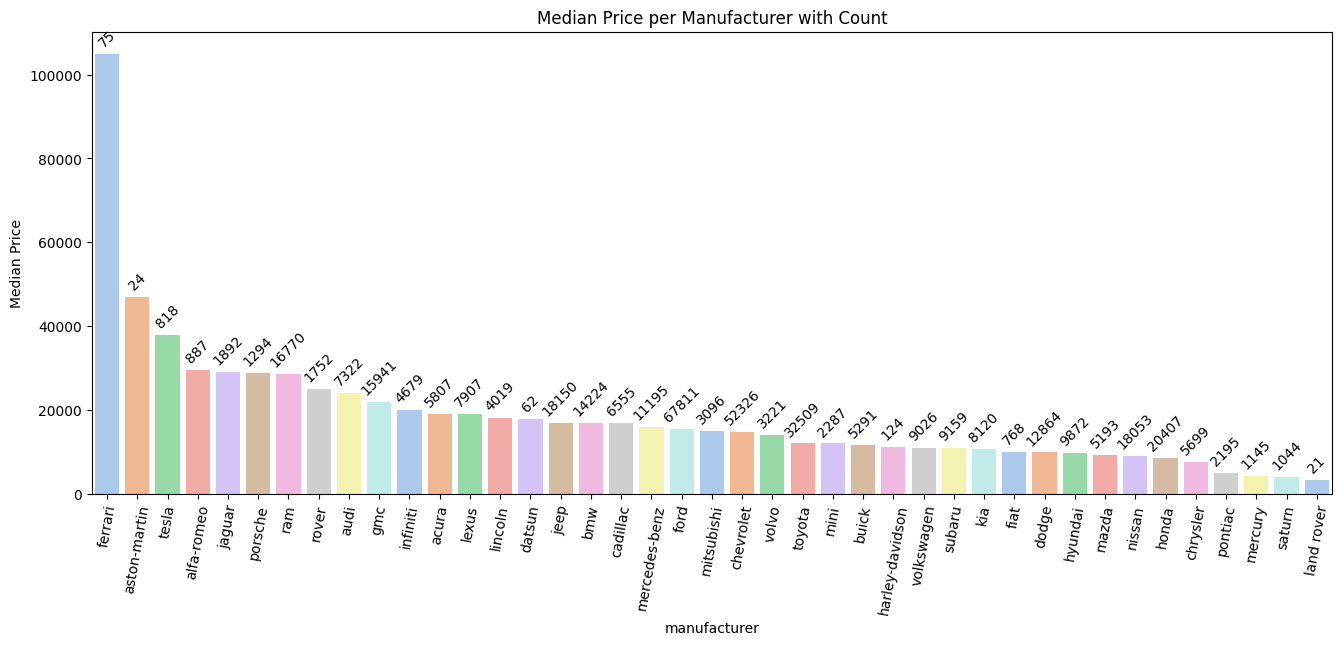

In [18]:
# Compute median price and count per manufacturer
stats = df.groupby('manufacturer')['price'].agg(['median', 'count']).sort_values(by='median', ascending=False)

plt.figure(figsize=[16,6])

# Barplot for median price
sns.barplot(x=stats.index, y=stats['median'], palette='pastel')

# Add count labels on top of each bar
for i, count in enumerate(stats['count']):
    plt.text(i, stats['median'][i] + stats['median'].max()*0.01, str(count), ha='center', va='bottom', fontsize=10,rotation=45 )

plt.xticks(rotation=80)
plt.ylabel('Median Price')
plt.title('Median Price per Manufacturer with Count')
plt.show()


## Ferrari, Aston-martin seems to have highest prices  from our graph (based on median car price per manufacturer)
#### This seems correct, as they are luxury car brands 

## Condition vs Price

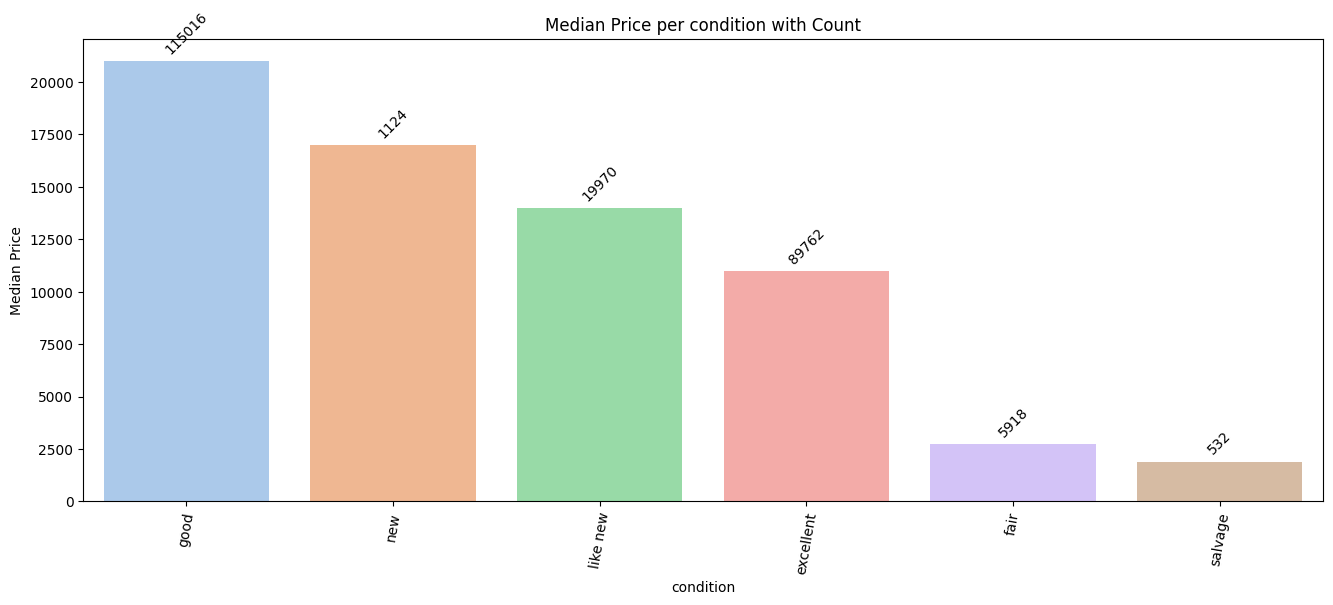

In [19]:
# Compute median price and count per condition
stats = df.groupby('condition')['price'].agg(['median', 'count']).sort_values(by='median', ascending=False)

plt.figure(figsize=[16,6])

# Barplot for median price
sns.barplot(x=stats.index, y=stats['median'], palette='pastel')

# Add count labels on top of each bar
for i, count in enumerate(stats['count']):
    plt.text(i, stats['median'][i] + stats['median'].max()*0.01, str(count), ha='center', va='bottom', fontsize=10,rotation=45 )

plt.xticks(rotation=80)
plt.ylabel('Median Price')
plt.title('Median Price per condition with Count')
plt.show()


## Most of the cars are in good condition, and price seems to be directly proportional to the condition of cars, salvage, fair condition seems to have lowest price, which make sense

## Fuel type vs price

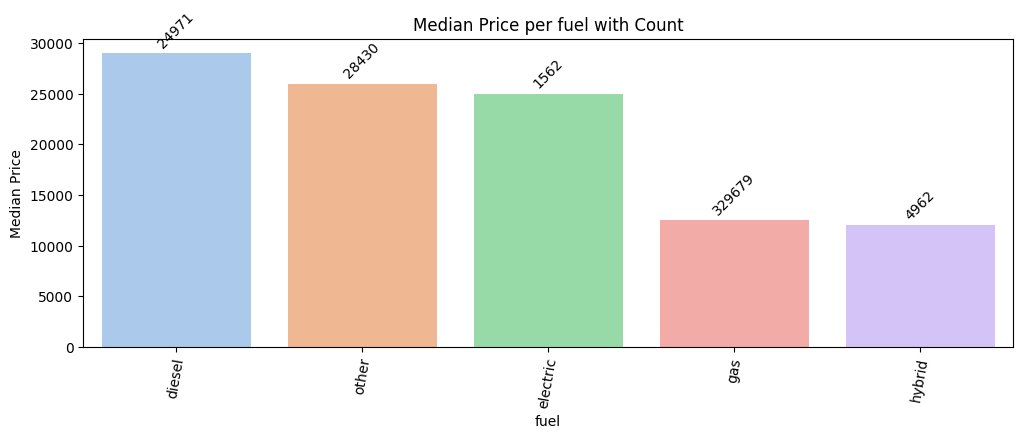

In [20]:
# Compute median price and count per fuel
stats = df.groupby('fuel')['price'].agg(['median', 'count']).sort_values(by='median', ascending=False)

plt.figure(figsize=[12,4])

# Barplot for median price
sns.barplot(x=stats.index, y=stats['median'], palette='pastel')

# Add count labels on top of each bar
for i, count in enumerate(stats['count']):
    plt.text(i, stats['median'][i] + stats['median'].max()*0.01, str(count), ha='center', va='bottom', fontsize=10,rotation=45 )

plt.xticks(rotation=80)
plt.ylabel('Median Price')
plt.title('Median Price per fuel with Count')
plt.show()


### 

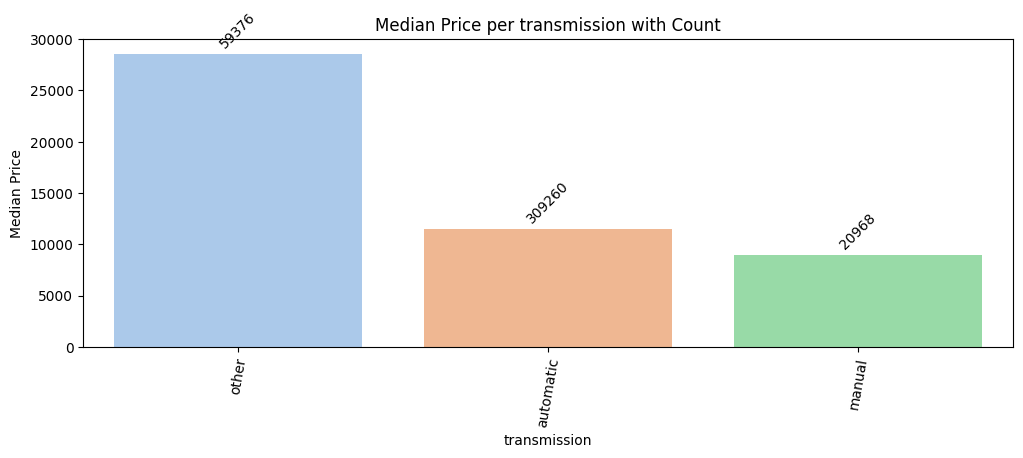

In [21]:
# Compute median price and count per transmission
stats = df.groupby('transmission')['price'].agg(['median', 'count']).sort_values(by='median', ascending=False)

plt.figure(figsize=[12,4])

# Barplot for median price
sns.barplot(x=stats.index, y=stats['median'], palette='pastel')

# Add count labels on top of each bar
for i, count in enumerate(stats['count']):
    plt.text(i, stats['median'][i] + stats['median'].max()*0.01, str(count), ha='center', va='bottom', fontsize=10,rotation=45 )

plt.xticks(rotation=80)
plt.ylabel('Median Price')
plt.title('Median Price per transmission with Count')
plt.show()


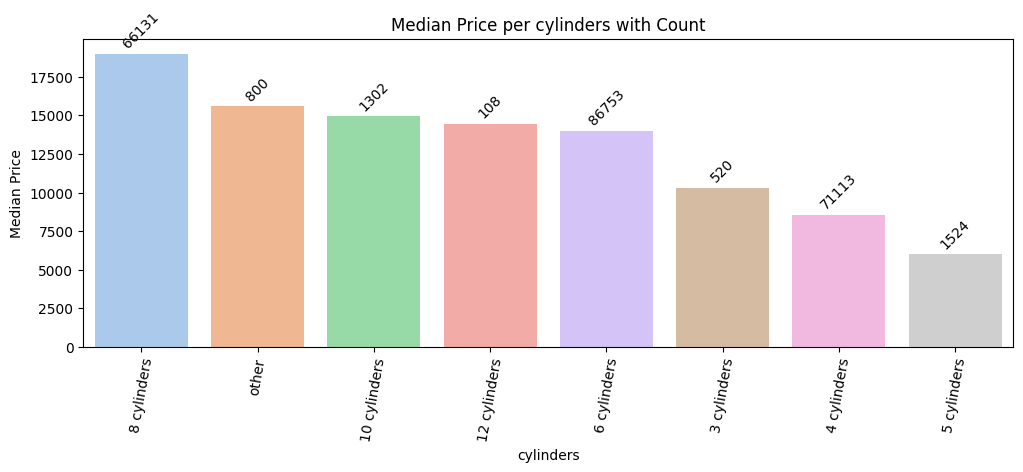

In [22]:
# Compute median price and count per cylinders
stats = df.groupby('cylinders')['price'].agg(['median', 'count']).sort_values(by='median', ascending=False)

plt.figure(figsize=[12,4])

# Barplot for median price
sns.barplot(x=stats.index, y=stats['median'], palette='pastel')

# Add count labels on top of each bar
for i, count in enumerate(stats['count']):
    plt.text(i, stats['median'][i] + stats['median'].max()*0.01, str(count), ha='center', va='bottom', fontsize=10,rotation=45 )

plt.xticks(rotation=80)
plt.ylabel('Median Price')
plt.title('Median Price per cylinders with Count')
plt.show()


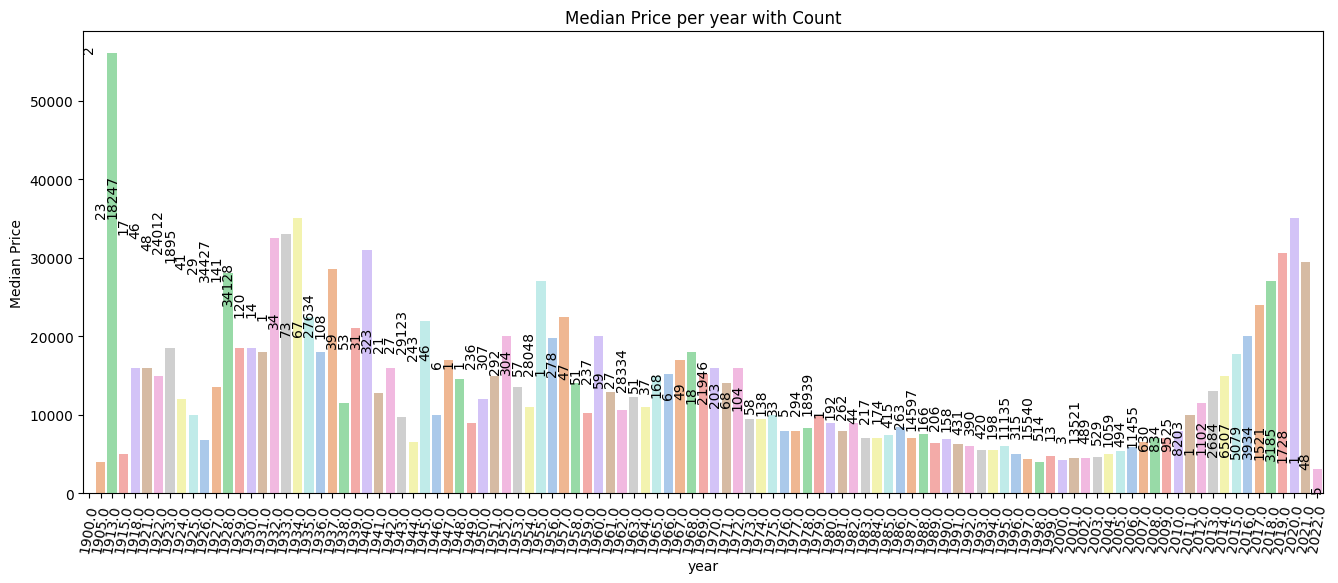

In [23]:
# Compute median price and count per year
stats = df.groupby('year')['price'].agg(['median', 'count']).sort_values(by='median', ascending=False)

plt.figure(figsize=[16,6])

# Barplot for median price
sns.barplot(x=stats.index, y=stats['median'], palette='pastel', ci=None)

# Add count labels on top of each bar
for i, count in enumerate(stats['count']):
    plt.text(i, stats['median'].iloc[i] + stats['median'].min()*0.1, str(count), 
             ha='center', va='bottom', fontsize=10, rotation=90)

plt.xticks(rotation=80)
plt.ylabel('Median Price')
plt.title('Median Price per year with Count')
plt.show()


## Price seems to follow trend for years, like after 1999, cars price keeps increasing, more likely becuase older cars tends to have low price. Before that, relationship is not that linear, possibly due to vintage luxury cars and their low counts.

## Title vs price

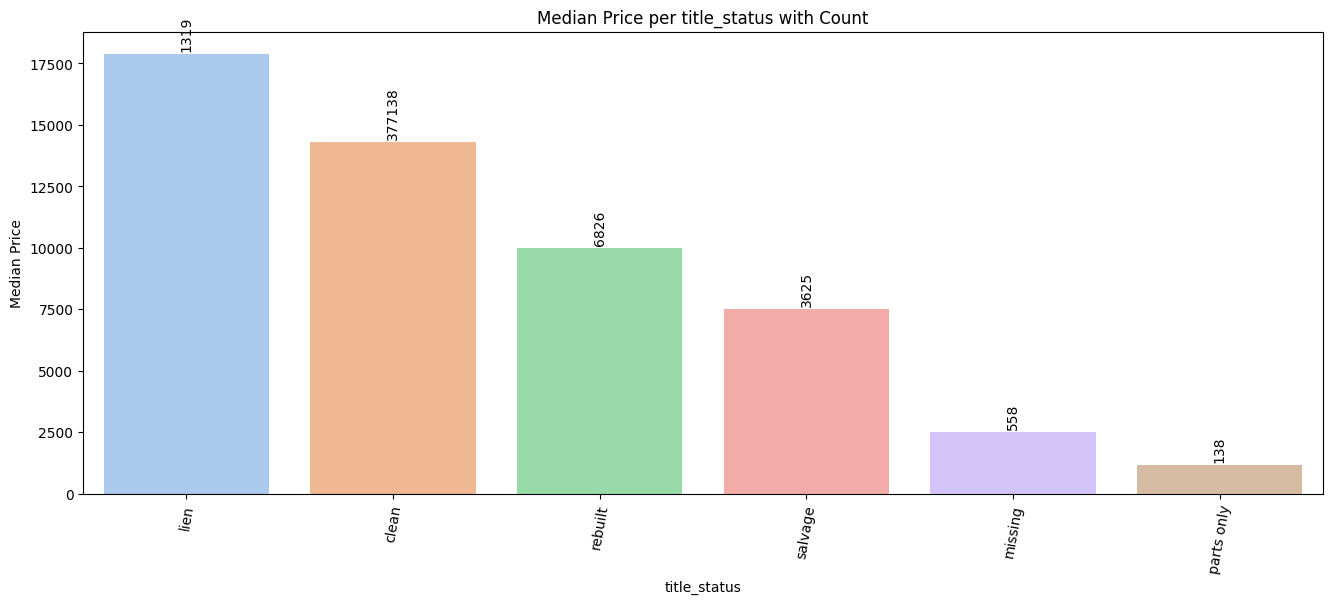

In [24]:
stats = df.groupby('title_status')['price'].agg(['median', 'count']).sort_values(by='median', ascending=False)

plt.figure(figsize=[16,6])

# Barplot for median price
sns.barplot(x=stats.index, y=(stats['median']), palette='pastel', ci=None)

# Add count labels on top of each bar
for i, count in enumerate(stats['count']):
    plt.text(i, stats['median'].iloc[i] + stats['median'].min()*0.1, str(count), 
             ha='center', va='bottom', fontsize=10, rotation=90)

plt.xticks(rotation=80)
plt.ylabel('Median Price')
plt.title('Median Price per title_status with Count')
plt.show()


## cars with parts only, missing parts, etc. have lower price, which makes sense, 
## but lien cars have highest prices, dealers should make sure to not purchase such cars, and prefer clean status ones  

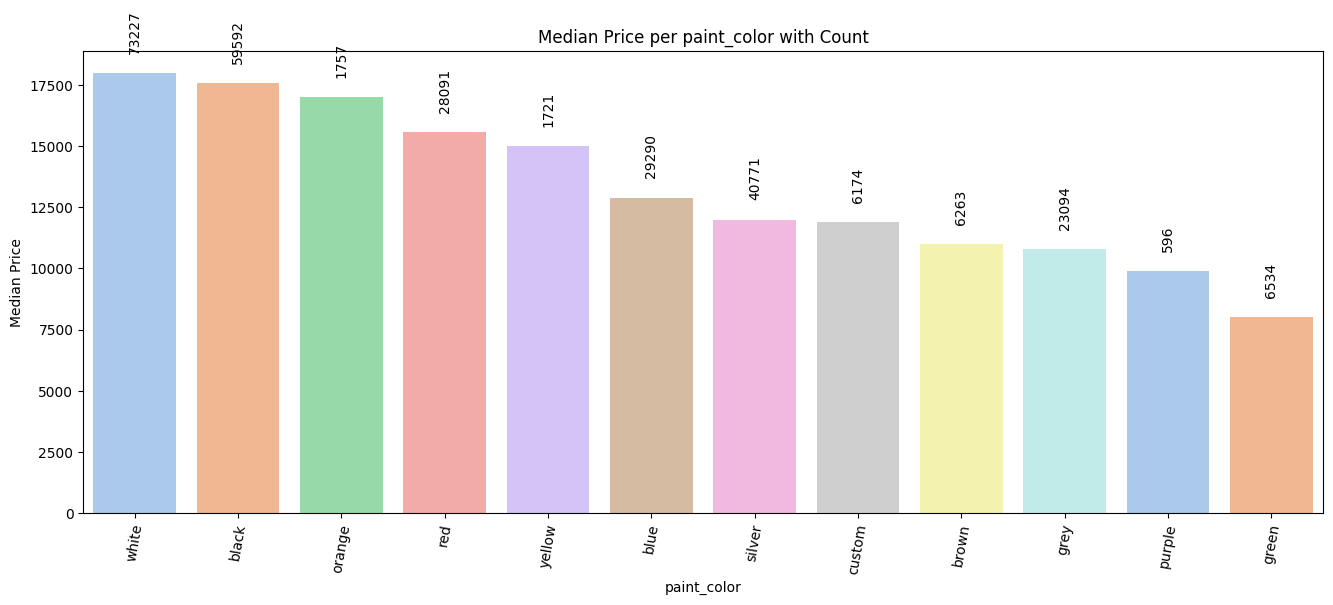

In [25]:
stats = df.groupby('paint_color')['price'].agg(['median', 'count']).sort_values(by='median', ascending=False)

plt.figure(figsize=[16,6])

# Barplot for median price
sns.barplot(x=stats.index, y=(stats['median']), palette='pastel', ci=None)

# Add count labels on top of each bar
for i, count in enumerate(stats['count']):
    plt.text(i, stats['median'].iloc[i] + stats['median'].min()*0.1, str(count), 
             ha='center', va='bottom', fontsize=10, rotation=90)

plt.xticks(rotation=80)
plt.ylabel('Median Price')
plt.title('Median Price per paint_color with Count')
plt.show()


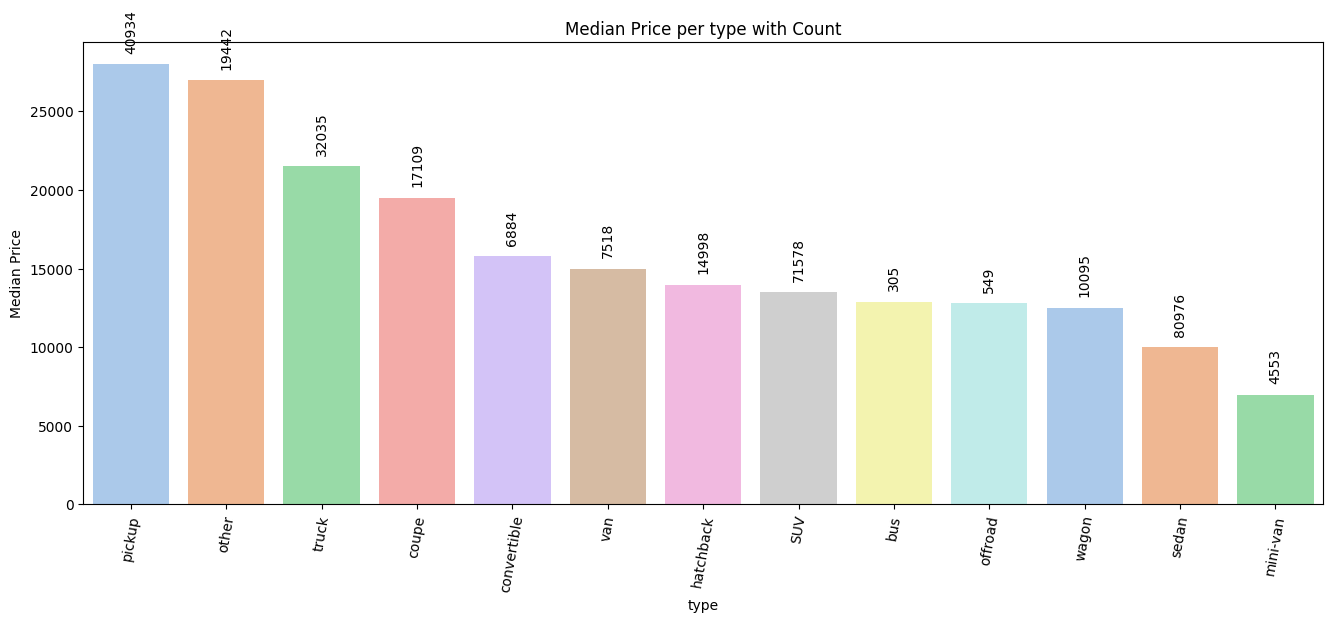

In [26]:
stats = df.groupby('type')['price'].agg(['median', 'count']).sort_values(by='median', ascending=False)

plt.figure(figsize=[16,6])

# Barplot for median price
sns.barplot(x=stats.index, y=(stats['median']), palette='pastel', ci=None)

# Add count labels on top of each bar
for i, count in enumerate(stats['count']):
    plt.text(i, stats['median'].iloc[i] + stats['median'].min()*0.1, str(count), 
             ha='center', va='bottom', fontsize=10, rotation=90)

plt.xticks(rotation=80)
plt.ylabel('Median Price')
plt.title('Median Price per type with Count')
plt.show()


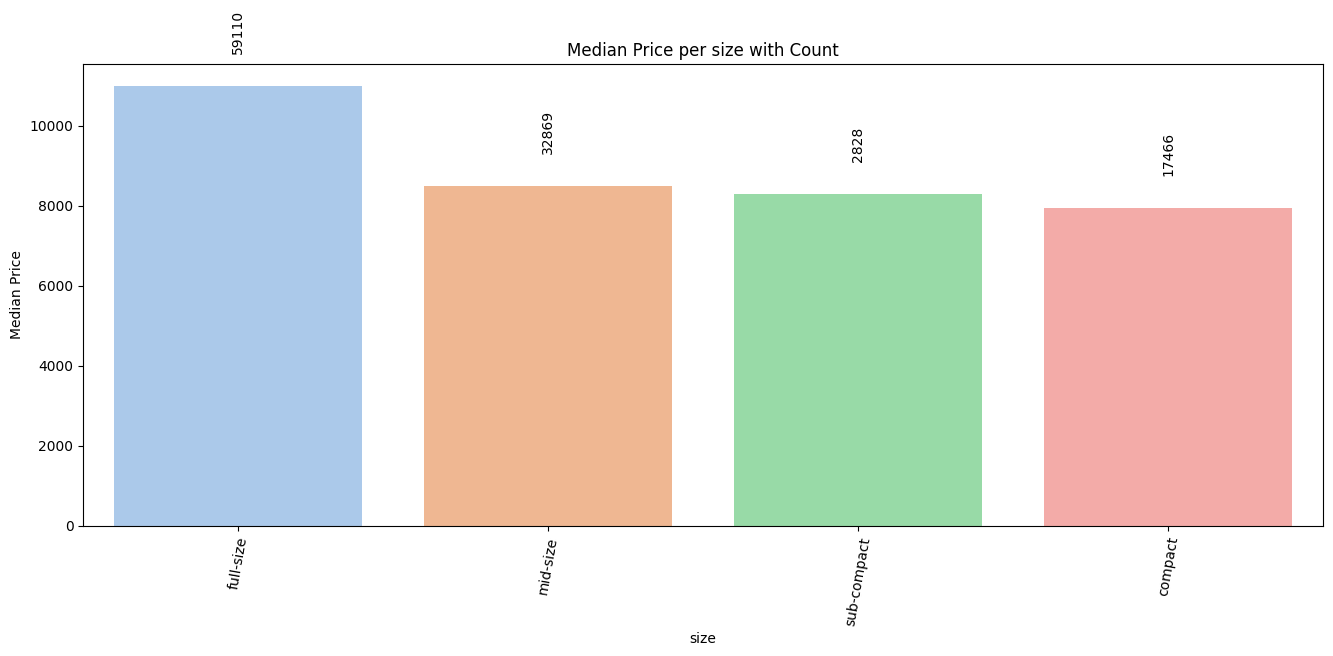

In [27]:
stats = df.groupby('size')['price'].agg(['median', 'count']).sort_values(by='median', ascending=False)

plt.figure(figsize=[16,6])

# Barplot for median price
sns.barplot(x=stats.index, y=(stats['median']), palette='pastel', ci=None)

# Add count labels on top of each bar
for i, count in enumerate(stats['count']):
    plt.text(i, stats['median'].iloc[i] + stats['median'].min()*0.1, str(count), 
             ha='center', va='bottom', fontsize=10, rotation=90)

plt.xticks(rotation=80)
plt.ylabel('Median Price')
plt.title('Median Price per size with Count')
plt.show()


## Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [28]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7316814884,auburn,33590,"2,014",gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,"57,923",clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,al
1,7316814758,auburn,22590,"2,010",chevrolet,silverado 1500,good,8 cylinders,gas,"71,229",clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,al
2,7316814989,auburn,39590,"2,020",chevrolet,silverado 1500 crew,good,8 cylinders,gas,"19,160",clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,al
3,7316743432,auburn,30990,"2,017",toyota,tundra double cab sr,good,8 cylinders,gas,"41,124",clean,other,5TFRM5F17HX120972,NaN,NaN,pickup,red,al
4,7316356412,auburn,15000,"2,013",ford,f-150 xlt,excellent,6 cylinders,gas,"128,000",clean,automatic,NaN,rwd,full-size,truck,black,al


# replace remaining null values with mode

In [29]:
#Imputation for missing values
df['year'].fillna(df['year'].mode()[0], inplace=True)
df['manufacturer'].fillna(df['manufacturer'].mode()[0], inplace=True)
df['condition'].fillna(df['condition'].mode()[0], inplace=True)
df['cylinders'].fillna(df['cylinders'].mode()[0], inplace=True)
df['fuel'].fillna(df['fuel'].mode()[0], inplace=True)
df['title_status'].fillna(df['title_status'].mode()[0], inplace=True)
df['transmission'].fillna(df['transmission'].mode()[0], inplace=True)
df['drive'].fillna(df['drive'].mode()[0], inplace=True)
df['type'].fillna(df['type'].mode()[0], inplace=True)
df['paint_color'].fillna(df['paint_color'].mode()[0], inplace=True)


In [30]:
print(df['price'].astype(int).describe())

count         389,604
mean           63,955
std        11,448,646
min                 0
25%             5,995
50%            13,995
75%            26,590
max     3,736,928,711
Name: price, dtype: float64


In [31]:
df[df['price']==0]

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
19,7315039307,auburn,0,"2,011",jeep,compass,excellent,6 cylinders,gas,"99,615",clean,automatic,NaN,4wd,full-size,SUV,white,al
95,7305672709,auburn,0,"2,018",chevrolet,express cargo van,like new,6 cylinders,gas,"68,472",clean,automatic,1GCWGAFP8J1309579,rwd,full-size,van,white,al
96,7305672266,auburn,0,"2,019",chevrolet,express cargo van,like new,6 cylinders,gas,"69,125",clean,automatic,1GCWGAFP4K1214373,rwd,full-size,van,white,al
97,7305672252,auburn,0,"2,018",chevrolet,express cargo van,like new,6 cylinders,gas,"66,555",clean,automatic,1GCWGAFPXJ1337903,rwd,full-size,van,white,al
156,7316755272,birmingham,0,"2,015",nissan,sentra,excellent,4 cylinders,gas,"99,505",clean,automatic,3N1AB7AP8FY348505,fwd,NaN,sedan,silver,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389507,7303399788,wyoming,0,"2,009",toyota,prius,excellent,4 cylinders,hybrid,"271,000",clean,automatic,JTDKB20U993526186,fwd,NaN,sedan,white,wy
389554,7302877815,wyoming,0,"2,006",toyota,scion tc,excellent,4 cylinders,gas,"195,000",clean,automatic,JTKDE177460109655,fwd,NaN,sedan,silver,wy
389569,7302353283,wyoming,0,"2,004",toyota,prius,excellent,4 cylinders,hybrid,"239,000",clean,automatic,JTDKB20U840108051,fwd,NaN,sedan,blue,wy
389571,7302301268,wyoming,0,"2,018",ram,2500,excellent,6 cylinders,diesel,"20,492",clean,automatic,3C6UR5HL3JG307217,4wd,full-size,truck,white,wy


28,576 cars have 0 price. This doesn't make sense

In [32]:
price_low = df['price'].quantile(0.1)
price_high = df['price'].quantile(0.99)
print(price_low,price_high)


900.0 64999.0


In [33]:
df = df.query('price > @price_low and price < @price_high')
df.describe()


,id,price,year,odometer
count,"346,569","346,569","346,569","346,569"
mean,"7,311,481,664","18,772","2,011","97,271"
std,"4,384,498","13,017",9,"166,756"
min,"7,301,583,321",902,"1,900",0
25%,"7,308,094,681","7,950","2,008","39,253"
50%,"7,312,610,312","15,990","2,013","88,664"
75%,"7,315,244,272","27,788","2,017","136,322"
max,"7,317,101,084","64,998","2,022","10,000,000"


## Similarly, we will remove odometer outliers 

In [34]:
odometer_low = df['odometer'].quantile(0.01)
odometer_high = df['odometer'].quantile(0.99)
print(odometer_low,odometer_high)


107.0 268000.0


In [35]:
df = df.query('odometer > @odometer_low and odometer < @odometer_high')
df.describe()


,id,price,year,odometer
count,"339,631","339,631","339,631","339,631"
mean,"7,311,475,316","18,857","2,011","92,471"
std,"4,386,188","12,982",8,"59,736"
min,"7,301,583,321",902,"1,900",108
25%,"7,308,083,232","7,995","2,008","40,003"
50%,"7,312,598,911","15,995","2,013","88,664"
75%,"7,315,242,086","27,900","2,017","135,123"
max,"7,317,101,084","64,998","2,022","267,882"


In [36]:
# dropping columns id and VIN as they are not providing relevant info
df= df.drop(['id','VIN'],axis=1)
df.head(2)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,auburn,33590,"2,014",gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,"57,923",clean,other,4wd,NaN,pickup,white,al
1,auburn,22590,"2,010",chevrolet,silverado 1500,good,8 cylinders,gas,"71,229",clean,other,4wd,NaN,pickup,blue,al


In [37]:
df['size'].value_counts()

full-size      50671
mid-size       29283
compact        15191
sub-compact     2467
Name: size, dtype: int64

In [38]:
df['transmission'].value_counts()


automatic    263949
other         57424
manual        18258
Name: transmission, dtype: int64

In [39]:
# corr = df.corr()

# Encoding

In [40]:
df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,auburn,33590,"2,014",gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,"57,923",clean,other,4wd,NaN,pickup,white,al
1,auburn,22590,"2,010",chevrolet,silverado 1500,good,8 cylinders,gas,"71,229",clean,other,4wd,NaN,pickup,blue,al
2,auburn,39590,"2,020",chevrolet,silverado 1500 crew,good,8 cylinders,gas,"19,160",clean,other,4wd,NaN,pickup,red,al
3,auburn,30990,"2,017",toyota,tundra double cab sr,good,8 cylinders,gas,"41,124",clean,other,4wd,NaN,pickup,red,al
4,auburn,15000,"2,013",ford,f-150 xlt,excellent,6 cylinders,gas,"128,000",clean,automatic,rwd,full-size,truck,black,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389599,wyoming,23590,"2,019",nissan,maxima s sedan 4d,good,6 cylinders,gas,"32,226",clean,other,fwd,NaN,sedan,white,wy
389600,wyoming,30590,"2,020",volvo,s60 t5 momentum sedan 4d,good,6 cylinders,gas,"12,029",clean,other,fwd,NaN,sedan,red,wy
389601,wyoming,34990,"2,020",cadillac,xt4 sport suv 4d,good,6 cylinders,diesel,"4,174",clean,other,4wd,NaN,hatchback,white,wy
389602,wyoming,28990,"2,018",lexus,es 350 sedan 4d,good,6 cylinders,gas,"30,112",clean,other,fwd,NaN,sedan,silver,wy


In [41]:
# import pandas as pd
# from sklearn.preprocessing import OrdinalEncoder

# categorical_cols = ['region','manufacturer','model','condition','cylinders','fuel','transmission',
#                     'drive','size','type','paint_color','state','title_status']

# encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

# df[categorical_cols] = encoder.fit_transform(df[categorical_cols])


In [42]:
df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,auburn,33590,"2,014",gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,"57,923",clean,other,4wd,NaN,pickup,white,al
1,auburn,22590,"2,010",chevrolet,silverado 1500,good,8 cylinders,gas,"71,229",clean,other,4wd,NaN,pickup,blue,al
2,auburn,39590,"2,020",chevrolet,silverado 1500 crew,good,8 cylinders,gas,"19,160",clean,other,4wd,NaN,pickup,red,al
3,auburn,30990,"2,017",toyota,tundra double cab sr,good,8 cylinders,gas,"41,124",clean,other,4wd,NaN,pickup,red,al
4,auburn,15000,"2,013",ford,f-150 xlt,excellent,6 cylinders,gas,"128,000",clean,automatic,rwd,full-size,truck,black,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389599,wyoming,23590,"2,019",nissan,maxima s sedan 4d,good,6 cylinders,gas,"32,226",clean,other,fwd,NaN,sedan,white,wy
389600,wyoming,30590,"2,020",volvo,s60 t5 momentum sedan 4d,good,6 cylinders,gas,"12,029",clean,other,fwd,NaN,sedan,red,wy
389601,wyoming,34990,"2,020",cadillac,xt4 sport suv 4d,good,6 cylinders,diesel,"4,174",clean,other,4wd,NaN,hatchback,white,wy
389602,wyoming,28990,"2,018",lexus,es 350 sedan 4d,good,6 cylinders,gas,"30,112",clean,other,fwd,NaN,sedan,silver,wy


## Dropping vehicles with odometer reading greater than 100000 (outliers), for better model performance 

In [43]:
# df =df.drop(['drive','paint_color','title_status'],axis=1)

In [44]:
categorical_columns = ['title_status', 'transmission', 'type', 'condition', 'fuel','paint_color', 'cylinders', 'region', 'manufacturer', 'state' ]
# categorical_columns = [ 'transmission', 'type', 'condition', 'fuel', 'cylinders', 'region', 'manufacturer', 'state' ]

numerical_columns = ['year', 'odometer']

In [45]:
X, y = df.drop(['price'],axis=1), df['price']

In [46]:
X = X[categorical_columns + numerical_columns]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# X_train

In [49]:
X_test

,title_status,transmission,type,condition,fuel,paint_color,cylinders,region,manufacturer,state,year,odometer
382513,clean,manual,sedan,good,gas,white,6 cylinders,la crosse,subaru,wi,"2,013","78,825"
388373,clean,automatic,truck,good,gas,white,8 cylinders,wausau,chevrolet,wi,"2,008","115,000"
7392,clean,automatic,truck,good,gas,silver,8 cylinders,fairbanks,chevrolet,ak,"2,020","38,069"
101267,clean,other,sedan,good,other,blue,6 cylinders,south florida,subaru,fl,"2,016","57,707"
252852,clean,automatic,SUV,excellent,gas,grey,4 cylinders,new york city,nissan,ny,"2,013","106,000"
...,...,...,...,...,...,...,...,...,...,...,...,...
116286,clean,manual,sedan,excellent,gas,blue,4 cylinders,hawaii,subaru,hi,"2,017","19,151"
17758,clean,automatic,sedan,good,diesel,white,6 cylinders,little rock,ford,ar,"2,015","107,759"
197585,clean,automatic,sedan,good,gas,white,6 cylinders,rochester,mercedes-benz,mn,"2,015","84,011"
45712,clean,automatic,sedan,good,gas,white,6 cylinders,reno / tahoe,mercedes-benz,ca,"2,003","75,758"


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

## We will use Linear, Ridge / Lasso Regression

In [50]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from category_encoders.james_stein import JamesSteinEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline


metrics = []

def generate_model(model_conf, model_transformer, X_train, X_test, y_train, y_test):
  model_transformer.fit(X_train, y_train)
  y_train_pred = model_transformer.predict(X_train)
  y_test_pred = model_transformer.predict(X_test)
  # Mean Absolute Error
  mae_train = mean_absolute_error(y_train, y_train_pred)
  mae_test  = mean_absolute_error(y_test, y_test_pred)
  # Root Mean Squared Error
  rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
  rmse_test  = np.sqrt(mean_squared_error(y_test, y_test_pred))
  # Mean Squared Error
  mse_train = mean_squared_error(y_train, y_train_pred)
  mse_test  = mean_squared_error(y_test, y_test_pred)
  # R² (Determination coefficient)
  r2 = r2_score(y_test, y_test_pred)

  metrics.append({ 'Model': model_conf, 'MAE Train': mae_train,  'MAE Test': mae_test, 'MSE Train': mse_train,  'MSE Test': mse_test, 'RMSE Train': rmse_train, 'RMSE Test': rmse_test, 'Determination coefficient': r2 })
  print(f'{model_conf} MAE Train: {mae_train: .2f}')
  print(f'{model_conf} MAE Test: {mae_test: .2f}')
  print(f'{model_conf} MSE Train: {mse_train: .2f}')
  print(f'{model_conf} MSE Test: {mse_test: .2f}')
  print(f'{model_conf} RMSE Train: {rmse_train: .2f}')
  print(f'{model_conf} RMSE Test: {rmse_test: .2f}')
  print(f'{model_conf} Determination coefficient: {r2: .2f}')

## with linear Regression and JamesSteinEncoder, StandardScaler

In [85]:
categorical_columns

['title_status',
 'transmission',
 'type',
 'condition',
 'fuel',
 'paint_color',
 'cylinders',
 'region',
 'manufacturer',
 'state']

In [86]:
numerical_columns

['year', 'odometer']

In [51]:
model_transformer = make_column_transformer((JamesSteinEncoder(), categorical_columns),
                                            (StandardScaler(), numerical_columns),
                                            remainder='passthrough')
model_pipe = Pipeline([('transformer', model_transformer), ('linreg', LinearRegression())])
generate_model('Model with James Stein Encoder and Standard Scaler', model_pipe, X_train, X_test, y_train, y_test)

Model with James Stein Encoder and Standard Scaler MAE Train:  5936.64
Model with James Stein Encoder and Standard Scaler MAE Test:  5959.63
Model with James Stein Encoder and Standard Scaler MSE Train:  63244275.70
Model with James Stein Encoder and Standard Scaler MSE Test:  63477687.25
Model with James Stein Encoder and Standard Scaler RMSE Train:  7952.63
Model with James Stein Encoder and Standard Scaler RMSE Test:  7967.29
Model with James Stein Encoder and Standard Scaler Determination coefficient:  0.62


### with LinearRegression and OneHotEncoder

In [52]:
model_transformer = make_column_transformer((OneHotEncoder(), categorical_columns), remainder='passthrough')
model_pipe = Pipeline([('transformer', model_transformer), ('linreg', LinearRegression())])
generate_model('Model with One Hot Encoder', model_pipe, X_train, X_test, y_train, y_test)


Model with One Hot Encoder MAE Train:  5993.63
Model with One Hot Encoder MAE Test:  5995.10
Model with One Hot Encoder MSE Train:  65267092.58
Model with One Hot Encoder MSE Test:  65036997.51
Model with One Hot Encoder RMSE Train:  8078.81
Model with One Hot Encoder RMSE Test:  8064.55
Model with One Hot Encoder Determination coefficient:  0.61


### with Ridge Regreesion, StandardScaler, OneHotEncoder

In [53]:
numerical_transformer = Pipeline([
    ('scaler', StandardScaler(with_mean=True, with_std=True)),
])

categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(
        handle_unknown='ignore', 
        sparse_output=True,
    )),
])

transformer = make_column_transformer(
    (categorical_transformer, categorical_columns),
    (numerical_transformer, numerical_columns),
    remainder='drop'
)

params_dict = {'alpha': [0.1, 1.0, 10.0]}
ridge = Ridge()

grid = Pipeline([
    ('preprocessor', transformer),
    ('model', GridSearchCV(ridge, param_grid=params_dict))
])


# grid.fit(X_train, y_train)
# train_preds = grid.predict(X_train)
# test_preds = grid.predict(X_test)
# train_mse = mean_squared_error(y_train, train_preds)
# test_mse = mean_squared_error(y_test, test_preds)
# ### END SOLUTION

# # Answer check
# print(f'Train MSE: {train_mse}')
# print(f'Test MSE: {test_mse}')
# model_best_alpha = grid.named_steps["model"].best_params_ 
# #model_best_alpha = grid.best_params_ 
# print(f'Best alpha: {model_best_alpha}')
# score = grid.score(X_test, y_test)
# print(f'Score: {score}')


In [54]:
generate_model('Model with Ridge', grid, X_train, X_test, y_train, y_test)


Model with Ridge MAE Train:  5490.36
Model with Ridge MAE Test:  5511.09
Model with Ridge MSE Train:  56178801.80
Model with Ridge MSE Test:  56512035.17
Model with Ridge RMSE Train:  7495.25
Model with Ridge RMSE Test:  7517.45
Model with Ridge Determination coefficient:  0.66


### with LASSO

In [55]:
numerical_transformer = Pipeline([
    ('scaler', StandardScaler(with_mean=True, with_std=True)),
])

categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(
        handle_unknown='ignore', 
        sparse_output=True,
    )),
])

transformer = make_column_transformer(
    (categorical_transformer, categorical_columns),
    (numerical_transformer, numerical_columns),
    remainder='drop'
)

params_dict = {'alpha': [0.1, 1.0, 10.0]}
lasso = Lasso()

grid = Pipeline([
    ('preprocessor', transformer),
    ('model', GridSearchCV(lasso, param_grid=params_dict))
])


# grid.fit(X_train, y_train)
# train_preds = grid.predict(X_train)
# test_preds = grid.predict(X_test)
# train_mse = mean_squared_error(y_train, train_preds)
# test_mse = mean_squared_error(y_test, test_preds)
# ### END SOLUTION

# # Answer check
# print(f'Train MSE: {train_mse}')
# print(f'Test MSE: {test_mse}')
# model_best_alpha = grid.named_steps["model"].best_params_ 
# #model_best_alpha = grid.best_params_ 
# print(f'Best alpha: {model_best_alpha}')
# score = grid.score(X_test, y_test)
# print(f'Score: {score}')


In [56]:
generate_model('Model with Lasso', grid, X_train, X_test, y_train, y_test)


Model with Lasso MAE Train:  5490.07
Model with Lasso MAE Test:  5510.49
Model with Lasso MSE Train:  56180353.07
Model with Lasso MSE Test:  56505253.81
Model with Lasso RMSE Train:  7495.36
Model with Lasso RMSE Test:  7517.00
Model with Lasso Determination coefficient:  0.66


# Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [76]:
df = pd.DataFrame(metrics)
pd.set_option('display.float_format', '{:.4f}'.format)
df = df.sort_values('Determination coefficient', ascending=False)
df

,Model,MAE Train,MAE Test,MSE Train,MSE Test,RMSE Train,RMSE Test,Determination coefficient
3,Model with Lasso,5490.0672,5510.4885,56180353.0680,56505253.8089,7495.3554,7516.9977,0.6644
2,Model with Ridge,5490.3586,5511.0930,56178801.7970,56512035.1670,7495.2520,7517.4487,0.6644
0,Model with James Stein Encoder and Standard Sc...,5936.6425,5959.6282,63244275.7007,63477687.2492,7952.6270,7967.2886,0.6230
1,Model with One Hot Encoder,5993.6279,5995.0978,65267092.5833,65036997.5082,8078.8051,8064.5519,0.6137


### Based on the metrics dataframe, 'Model with Lasso Regression' has highest Determination coefficient of 0.6644, lowest RMSE of 7516.9977 on Testing dataset, which suggests that it is a good model. 
### But Lasso takes much longer to train compared to Ridge, so can be choosed according to priority.

### Feature Importance

In [87]:
transformer

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['title_status', 'transmission', 'type',
                                  'condition', 'fuel', 'paint_color',
                                  'cylinders', 'region', 'manufacturer',
                                  'state']),
                                ('pipeline-2',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['year', 'odometer'])])

In [77]:
model_pipe.named_steps['linreg'].coef_.shape

(551,)

In [78]:
feature_names = model_pipe.named_steps['transformer'].get_feature_names_out()
feature_names

array(['onehotencoder__title_status_clean',
       'onehotencoder__title_status_lien',
       'onehotencoder__title_status_missing',
       'onehotencoder__title_status_parts only',
       'onehotencoder__title_status_rebuilt',
       'onehotencoder__title_status_salvage',
       'onehotencoder__transmission_automatic',
       'onehotencoder__transmission_manual',
       'onehotencoder__transmission_other', 'onehotencoder__type_SUV',
       'onehotencoder__type_bus', 'onehotencoder__type_convertible',
       'onehotencoder__type_coupe', 'onehotencoder__type_hatchback',
       'onehotencoder__type_mini-van', 'onehotencoder__type_offroad',
       'onehotencoder__type_other', 'onehotencoder__type_pickup',
       'onehotencoder__type_sedan', 'onehotencoder__type_truck',
       'onehotencoder__type_van', 'onehotencoder__type_wagon',
       'onehotencoder__condition_excellent',
       'onehotencoder__condition_fair', 'onehotencoder__condition_good',
       'onehotencoder__condition_like new'

In [79]:
import pandas as pd
import numpy as np

# Get feature names from transformer
feature_names = model_pipe.named_steps['transformer'].get_feature_names_out()

# Get coefficients
coefs = model_pipe.named_steps['linreg'].coef_

# Put them into a DataFrame
coef_df = pd.DataFrame({
    "feature": feature_names,
    "coefficient": coefs,
    "abs_importance": np.abs(coefs)
}).sort_values(by="abs_importance", ascending=False)

coef_df["Rank"]  = coef_df["abs_importance"].rank(ascending=False)
coef_df.head(20)

,feature,coefficient,abs_importance,Rank
28,onehotencoder__fuel_diesel,5311.6698,5311.6698,1.0000
51,onehotencoder__cylinders_8 cylinders,5089.1237,5089.1237,2.0000
48,onehotencoder__cylinders_4 cylinders,-4571.7332,4571.7332,3.0000
30,onehotencoder__fuel_gas,-4393.6271,4393.6271,4.0000
19,onehotencoder__type_truck,3625.2212,3625.2212,5.0000
18,onehotencoder__type_sedan,-3477.7631,3477.7631,6.0000
17,onehotencoder__type_pickup,3387.4201,3387.4201,7.0000
490,onehotencoder__manufacturer_ram,2530.6789,2530.6789,8.0000
13,onehotencoder__type_hatchback,-2240.6603,2240.6603,9.0000
470,onehotencoder__manufacturer_ford,1843.5653,1843.5653,10.0000


## Group wise importance

In [109]:
coef_df["group"] = coef_df["feature"].str.replace("onehotencoder__", "").str.replace("remainder__", "").str.split("_").str[0]
coef_df

,feature,coefficient,abs_importance,Rank,group
28,onehotencoder__fuel_diesel,5311.6698,5311.6698,1.0000,fuel
51,onehotencoder__cylinders_8 cylinders,5089.1237,5089.1237,2.0000,cylinders
48,onehotencoder__cylinders_4 cylinders,-4571.7332,4571.7332,3.0000,cylinders
30,onehotencoder__fuel_gas,-4393.6271,4393.6271,4.0000,fuel
19,onehotencoder__type_truck,3625.2212,3625.2212,5.0000,type
...,...,...,...,...,...
438,onehotencoder__region_western IL,-0.0797,0.0797,547.0000,region
191,onehotencoder__region_hattiesburg,-0.0577,0.0577,548.0000,region
310,onehotencoder__region_oneonta,0.0560,0.0560,549.0000,region
131,onehotencoder__region_del rio / eagle pass,-0.0116,0.0116,550.0000,region


In [110]:
group_importance = (
    coef_df.groupby("group")["abs_importance"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)
group_importance

,group,abs_importance
0,fuel,2124.6679
1,cylinders,1308.0083
2,type,1217.2257
3,manufacturer,486.9335
4,title,430.7226
5,year,395.8575
6,transmission,389.9188
7,paint,360.3905
8,state,177.2957
9,condition,153.1744


In [111]:
group_importance = (
    coef_df.groupby("group")["coefficient"]
    .max()
    .sort_values(ascending=False)
    .reset_index()
)
group_importance

,group,coefficient
0,fuel,5311.6698
1,cylinders,5089.1237
2,type,3625.2212
3,manufacturer,2530.6789
4,paint,1227.4137
5,title,1217.1184
6,state,922.1064
7,year,395.8575
8,transmission,359.2716
9,condition,245.9020


In [112]:
coef_df.query('feature.str.contains("region")')

,feature,coefficient,abs_importance,Rank,group
377,onehotencoder__region_south florida,-264.4328,264.4328,63.0000,region
79,onehotencoder__region_bend,240.1572,240.1572,68.0000,region
221,onehotencoder__region_kennewick-pasco-richland,224.0112,224.0112,70.0000,region
288,onehotencoder__region_new york city,-180.4528,180.4528,78.0000,region
72,onehotencoder__region_bakersfield,178.7898,178.7898,79.0000,region
...,...,...,...,...,...
438,onehotencoder__region_western IL,-0.0797,0.0797,547.0000,region
191,onehotencoder__region_hattiesburg,-0.0577,0.0577,548.0000,region
310,onehotencoder__region_oneonta,0.0560,0.0560,549.0000,region
131,onehotencoder__region_del rio / eagle pass,-0.0116,0.0116,550.0000,region


In [113]:
coef_df.tail(20)


,feature,coefficient,abs_importance,Rank,group
212,onehotencoder__region_janesville,-0.6080,0.6080,532.0000,region
468,onehotencoder__manufacturer_ferrari,0.6048,0.6048,533.0000,manufacturer
174,onehotencoder__region_gadsden-anniston,0.5927,0.5927,534.0000,region
302,onehotencoder__region_northwest OK,0.5604,0.5604,535.0000,region
421,onehotencoder__region_twin falls,0.5299,0.5299,536.0000,region
177,onehotencoder__region_glens falls,-0.4099,0.4099,537.0000,region
263,onehotencoder__region_meadville,-0.3683,0.3683,538.0000,region
125,onehotencoder__region_dallas / fort worth,0.3292,0.3292,539.0000,region
280,onehotencoder__region_muncie / anderson,-0.3232,0.3232,540.0000,region
411,onehotencoder__region_texoma,0.3040,0.3040,541.0000,region


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

Overall, Fuel type, number of cylinders, manufacturer, year, etc. impacts the price of cars significantly. For example: Cars with Manufacturer as Ferari have higher prices compared to others.

#### Dealer should focus on cars that are more recent, have good, excellent condition and avoid buying cars that are salvage, missing parts, etc. 

#### Dealer should not buy cars with status as 'lein' as it is unsafe and these cars seems to have high prices

### Further improvements can be made by adding more features to the dataset